In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset and convert 'Fecha' to datetime
data = pd.read_csv('../../DATA/rainfall/EPM_hourly/EPM_houry.csv')
data['Fecha'] = pd.to_datetime(data['Fecha'])
data.set_index('Fecha', inplace=True)

In [5]:
# Calculate average correlations for each hour
average_correlations_by_hour = []
std_devs_by_hour = []

# Loop through each hour of the day (0-23)
for hour in range(24):
    # Filter data for the specific hour
    hourly_data = data[data.index.hour == hour]
    
    # Drop columns where all values are NaN
    hourly_data_clean = hourly_data.dropna(axis=1, how='all')
    
    if hourly_data_clean.shape[1] > 1:  # Need at least two columns to compute correlation
        # Calculate Spearman correlation matrix
        correlation_matrix = hourly_data_clean.corr(method='spearman')
        
        # Extract the upper triangle of the correlation matrix without the diagonal
        upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
        
        # Calculate the mean and standard deviation of the non-NaN correlations in the upper triangle
        mean_correlation = upper_triangle.stack().mean()
        std_dev_correlation = upper_triangle.stack().std()
        
        # Append the results for this hour
        average_correlations_by_hour.append(mean_correlation)
        std_devs_by_hour.append(std_dev_correlation)
    else:
        average_correlations_by_hour.append(np.nan)
        std_devs_by_hour.append(np.nan)


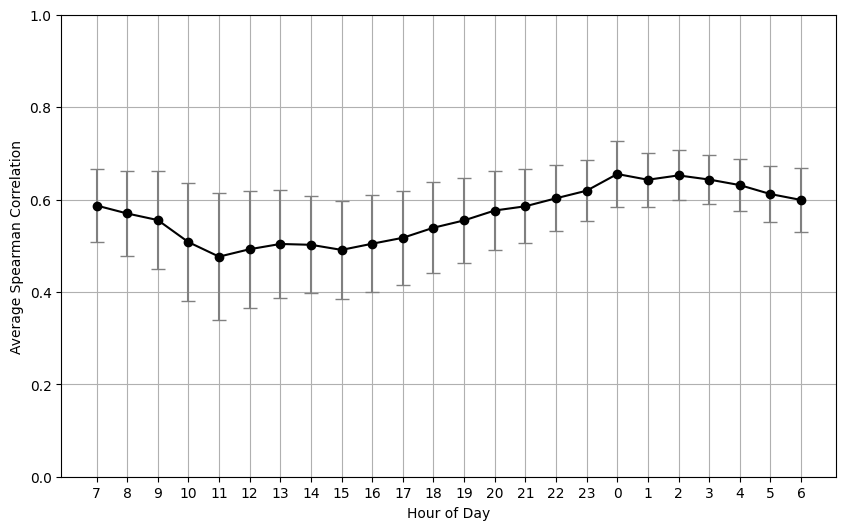

In [7]:
# Rearrange the data to start from 7 AM and end at 6 AM
shifted_correlations = average_correlations_by_hour[7:] + average_correlations_by_hour[:7]
shifted_std_devs = std_devs_by_hour[7:] + std_devs_by_hour[:7]

# Create corresponding x-axis labels to reflect the sequence from 7 AM to 6 AM
shifted_hours_labels = list(range(7, 24)) + list(range(0, 7))

# Plot the data with error bars representing the standard deviation
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(range(24), shifted_correlations, yerr=shifted_std_devs, fmt='o', linestyle='-', markersize=6, capsize=5, color='black', ecolor='gray')

# Set labels
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Spearman Correlation')

# Adjust x-axis labels on the bottom
ax.set_xticks(range(24))
ax.set_xticklabels(shifted_hours_labels)

# Set y-axis limits from 0 to 1
ax.set_ylim(0, 1)

# Add lines on the top and right sides to close the figure (without labels or ticks)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Hide ticks and labels on top and right axes
ax.tick_params(top=False, right=False)

# Add gridlines
ax.grid(True)

# Save the figure as PNG
plt.savefig('../../FIGURES/spatial_analysis/spearman_correlation_by_hour.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()